In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing import image

In [2]:
vgg = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the pre-trained layers
for layer in vgg.layers:
    layer.trainable = False

In [3]:
model = Sequential([
    vgg,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification: dog or cat
])

In [4]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Data Preprocessing
datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

In [5]:
train_generator = datagen.flow_from_directory(
    'C:\saranAI\Deep learning\Dog vs cat\Dataset',  # Replace with the path to your dataset
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

Found 140 images belonging to 2 classes.


In [6]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=16
)

Epoch 1/16
4/4 [==============================] - 27s 6s/step - loss: 0.7621 - accuracy: 0.6019
Epoch 2/16
4/4 [==============================] - 25s 6s/step - loss: 0.6927 - accuracy: 0.6389
Epoch 3/16
4/4 [==============================] - 29s 7s/step - loss: 0.5424 - accuracy: 0.7266
Epoch 4/16
4/4 [==============================] - 25s 6s/step - loss: 0.4951 - accuracy: 0.7315
Epoch 5/16
4/4 [==============================] - 24s 5s/step - loss: 0.3687 - accuracy: 0.8241
Epoch 6/16
4/4 [==============================] - 24s 5s/step - loss: 0.4776 - accuracy: 0.7500
Epoch 7/16
4/4 [==============================] - 23s 5s/step - loss: 0.3943 - accuracy: 0.8333
Epoch 8/16
4/4 [==============================] - 23s 5s/step - loss: 0.3252 - accuracy: 0.8611
Epoch 9/16
4/4 [==============================] - 30s 7s/step - loss: 0.2765 - accuracy: 0.8984
Epoch 10/16
4/4 [==============================] - 24s 5s/step - loss: 0.1990 - accuracy: 0.9444
Epoch 11/16
4/4 [======================

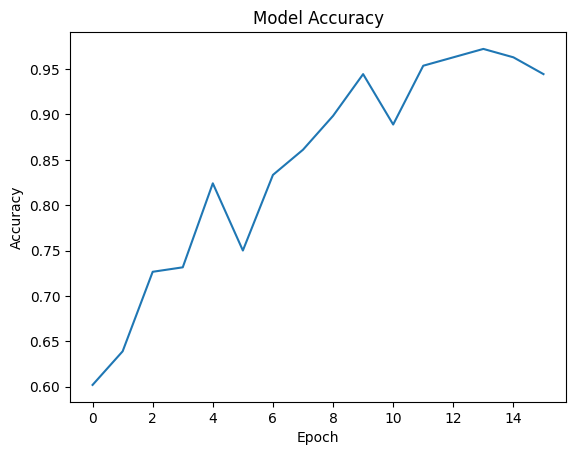

In [7]:
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()


In [8]:
model.save('cat_dog_classifier.h5')

In [21]:
def predict_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    
    prediction = model.predict(img_array)
    if prediction[0] > 0.5:
        result = "Dog"
    else:
        result = "Cat"
    
    # Display the image with the prediction
    plt.imshow(image.load_img(img_path, target_size=(224, 224)))
    plt.title(f"Prediction: {result}")
    plt.axis('off')  # Hide axis
    plt.show()


1/1 [==============================] - 0s 376ms/step


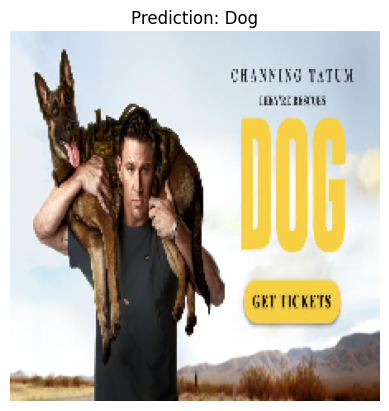

In [27]:
predict_image(r'C:\saranAI\Deep learning\Dog vs cat\Dataset\dogs\dog_521.jpg')  # Replace with the path to your test image